# Lab 2: Digit Recognition with LogReg/RF/GBT
### Univ.AI 
### ML-2 Cohort-1


In [93]:
#Import libraries
import time
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from collections import OrderedDict
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
%matplotlib inline

## Load the data

In [94]:
dataset = datasets.load_digits()

X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
X_train = X_train/255.0
X_test = X_test/255.0

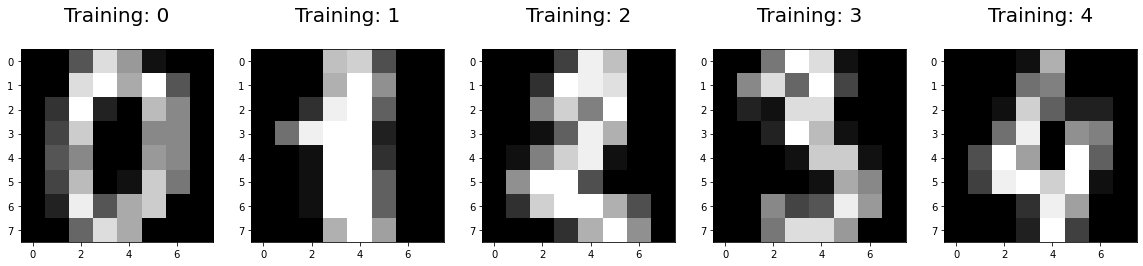

In [95]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(dataset.data[0:5], dataset.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

## Modelling

In [96]:
#Define a function to plot confusion matrix 
def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,  cbar=False, ax=ax)
    plt.ylabel('true label')
    plt.xlabel('predicted label')

### Logistic Regression

In [97]:
c_values = {"C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

#Hyper parameter tuning for Logistic regression
#your code here 

GCV = GridSearchCV(estimator=LogisticRegression(),param_grid=c_values)
GCV.fit(X_train,y_train)

#Finding the best value of C using GridSearchCV
#your code here 


C:\Users\rapathak\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rapathak\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000]})

In [98]:
print("C value for best estimatror: %d " %(GCV.best_estimator_.C))

C value for best estimatror: 1000 


In [99]:
#Print accuracy score of test data
GCV.best_estimator_.score(X_test,y_test)
#your code here 

0.9555555555555556

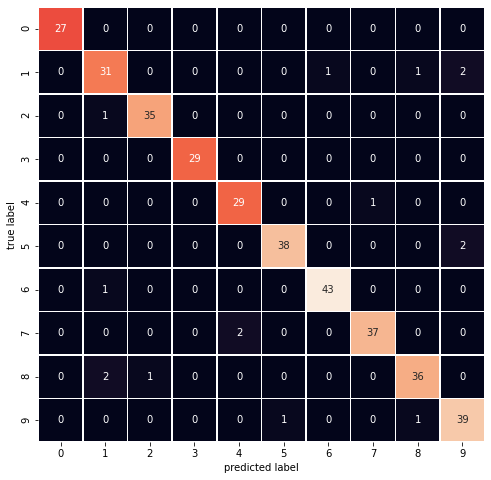

In [100]:
#Plot confusion matrix of test data
plot_confusion_matrix(y_test, GCV.best_estimator_.predict(X_test))

### Random Forest

In [101]:
#Create 2 models with same max_depth and different min_samples_leaf
ensemble_clfs = [(1,RandomForestClassifier(warm_start=True, min_samples_leaf=1,oob_score=True,max_depth = 10,random_state=420)),
                (5,RandomForestClassifier(warm_start=True, min_samples_leaf=5,oob_score=True,max_depth = 10,random_state=420))]

# Map a label (the value of `min_samples_leaf`) to a list of (model, oob error) tuples.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

min_estimators = 80
max_estimators = 500

#Create models for all n_estimators
for label,model in ensemble_clfs:
    for est in range(min_estimators,max_estimators+1):
        model.set_params(n_estimators=est)
        model.fit(X_train,y_train)
        
        oob_error = 1 - model.oob_score_
        error_rate[label].append((est, oob_error))








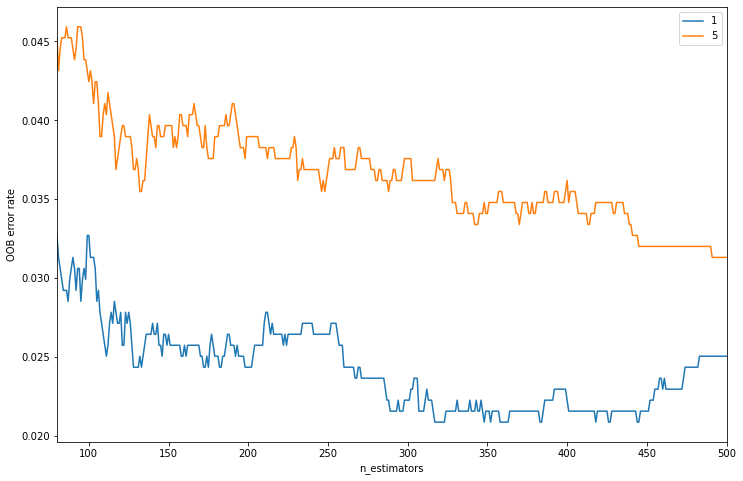

In [102]:

#Plot the OOB score vs n_estimators for different min_samples_leaf

#your code here 
fig, ax = plt.subplots(figsize=(12, 8))
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    ax.plot(xs, ys, label=label)
    
plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [103]:
#Find the best model by finding the lowest oob score and print out the min_samples_leaf and n_estimators for that model

#your code here 
dict_temp = {}
for label, clf_err in error_rate.items():
    dict_temp[label] = sorted(clf_err,key=lambda x:x[1])[0]
    
best_num_estimators = sorted(dict_temp.items(),key=lambda x:x[1][1])[0][1][0]
best_leaf = sorted(dict_temp.items(),key=lambda x:x[1][1])[0][0]


print(f'Optimum num of estimators: {best_num_estimators} \nmin_samples_leaf: {best_leaf}')

Optimum num of estimators: 317 
min_samples_leaf: 1


In [104]:
#Build the best model taking the above best parameters

best_model = RandomForestClassifier(warm_start=True, min_samples_leaf=best_leaf,oob_score=True,max_depth = 10,random_state=420,n_estimators=best_num_estimators)
best_model.fit(X_train,y_train)



RandomForestClassifier(max_depth=10, n_estimators=317, oob_score=True,
                       random_state=420, warm_start=True)

In [105]:
#Print accuracy score of test data
#your code here 
best_model.score(X_test,y_test)

0.9777777777777777

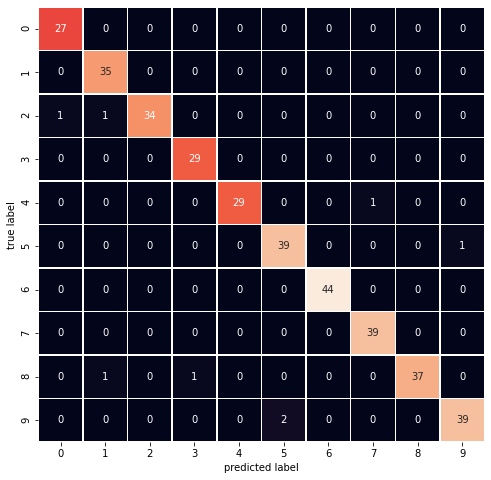

In [106]:
#Plot confusion matrix of test data
plot_confusion_matrix(y_test, best_model.predict(X_test))

### Gradient Boosting

In [107]:
n_estimators = 500
# We specify that if the scores don't improve by atleast 0.01 for the last 5 stages, stop fitting additional stages


#your code here
gb_model = GradientBoostingClassifier(n_estimators=n_estimators,random_state=1970)
start = time.time()
gb_model.fit(X_train,y_train)
gb_time = time.time() - start
without_prune_score = gb_model.score(X_test,y_test)
without_prune_no_of_estimator = gb_model.n_estimators_
print("score : %.3f" %(without_prune_score))
print("No of Estimator : %d" %(without_prune_no_of_estimator))
print("Time taken to fit : %.2f" %(gb_time))






score : 0.964
No of Estimator : 500
Time taken to fit : 28.54


In [108]:
#Predicting on the test data and calculating the accuracy score

#your code here
gb_model.score(X_test,y_test)

#Print accuracy score of test data
#your code here

0.9638888888888889

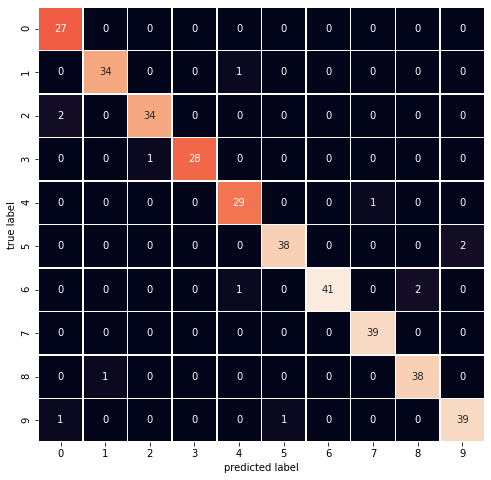

In [109]:
#Plot confusion matrix of test data
plot_confusion_matrix(y_test, gb_model.predict(X_test))

#### **Optional**

In [110]:
#Create a model with early stopping
gb_model_es = GradientBoostingClassifier(n_iter_no_change=5,tol=0.01,n_estimators=n_estimators,random_state=1970)
start = time.time()
gb_model_es.fit(X_train,y_train)
gbes_time = time.time() - start
score_with_pruning = gb_model_es.score(X_test,y_test)
num_estimator_pruning = gb_model_es.n_estimators_
print("score : %.3f" %(score_with_pruning))
print("No of Estimator : %d" %(num_estimator_pruning))
print("Time taken to fit : %.2f" %(gbes_time))

score : 0.947
No of Estimator : 52
Time taken to fit : 2.70


In [111]:
x_data = ['Without early stopping', 'With early stopping']
y_data = [without_prune_score,score_with_pruning]
print("n_est=%d, test score = %.3f"%((num_estimator_pruning) ,(y_data[0])))

n_est=52, test score = 0.964


In [112]:
index

4

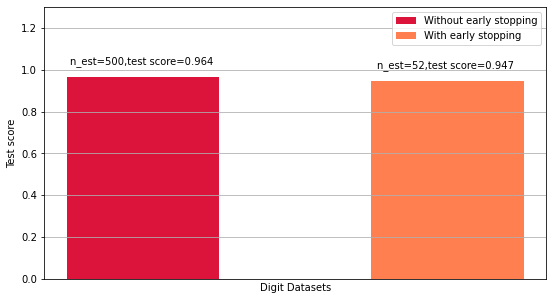

In [113]:

bar_width = 0.2
index = [0.2,0.6]
plt.figure(figsize=(9, 5))

bar1 = plt.bar(index[0], without_prune_score, bar_width, label='Without early stopping',
               color='crimson')
bar2 = plt.bar(index[1], score_with_pruning, bar_width, label='With early stopping', color='coral')

def autolabel(rects, n_estimators,score):
    """
    Attach a text label above each bar displaying n_estimators of each model
    """
    for i, rect in enumerate(rects):
        plt.text(rect.get_x() + rect.get_width() / 2.,
                 1.05 * rect.get_height(), 'n_est=%d,test score=%.3f ' % (n_estimators[i],score[i]),
                 ha='center', va='bottom')


autolabel(bar1, [without_prune_no_of_estimator],[without_prune_score])
autolabel(bar2, [num_estimator_pruning],[score_with_pruning])

plt.ylim([0, 1.3])
plt.legend(loc='best')
plt.grid(True)

plt.xlabel("Digit Datasets")
plt.ylabel('Test score')
plt.xticks([], [])

plt.show()


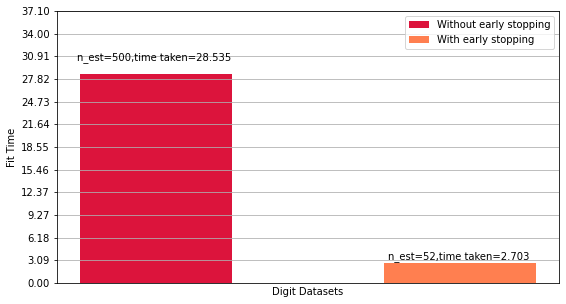

In [114]:
#Plot the test score for the gradient boosting model with and without early stopping
#your code here
plt.figure(figsize=(9, 5))

bar1 = plt.bar(index[0], gb_time, bar_width, label='Without early stopping',
               color='crimson')
bar2 = plt.bar(index[1], gbes_time, bar_width, label='With early stopping', color='coral')

def autolabel(rects, n_estimators,score):
    """
    Attach a text label above each bar displaying n_estimators of each model
    """
    for i, rect in enumerate(rects):
        plt.text(rect.get_x() + rect.get_width() / 2.,
                 1.05 * rect.get_height(), 'n_est=%d,time taken=%.3f ' % (n_estimators[i],score[i]),
                 ha='center', va='bottom')

max_y = np.maximum(gb_time, gbes_time)

#plt.xticks(index + bar_width, names)
plt.yticks(np.linspace(0, 1.3 * max_y, 13))

autolabel(bar1, [without_prune_no_of_estimator],[gb_time])
autolabel(bar2, [num_estimator_pruning],[gbes_time])
plt.ylim([0, 1.3 * max_y])
plt.legend(loc='best')
plt.grid(True)

plt.xlabel('Digit Datasets')
plt.ylabel('Fit Time')
plt.xticks([], [])
plt.show()

Which model did the best? : Considering both we can see with early stopping we are getting a bit less accurate model but significant less number of trees. So we can use early stopping.